In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
D1 = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
D1.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
D1.shape

(150, 5)

normalize the values in this dataset using standard scalar from sci kit
x-mean of x/standard deviation
we are trying to convert the dataset values to a normal distribution
one of the preprocessing of the data


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
D11=D1.drop(['target'],axis=1)

In [ ]:
D11.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler
X=D11
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) # Changed n_components to 3 (less than 4 features)
X_pca = pca.fit_transform(X_scaled) # Assign the transformed data to a new variable

print("Eigenvalues")
print(pca.explained_variance_) # Access eigenvalues using explained_variance_ on the original pca object

print('Eigen vectors')
print(pca.components_) # Now components_ will be available

Eigenvalues
[2.93035378 0.92740362 0.14834223 0.02074601]
Eigen vectors
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [ ]:
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4']) # Added 'principal component 4' to match the number of columns in X_pca
print(principalDf)
finalDf = pd.concat([principalDf, D1[['target']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2  principal component 3  \
0                -2.264542               0.505704               0.121943   
1                -2.086426              -0.655405               0.227251   
2                -2.367950              -0.318477              -0.051480   
3                -2.304197              -0.575368              -0.098860   
4                -2.388777               0.674767              -0.021428   
..                     ...                    ...                    ...   
145               1.870522               0.382822              -0.254532   
146               1.558492              -0.905314               0.025382   
147               1.520845               0.266795              -0.179277   
148               1.376391               1.016362              -0.931405   
149               0.959299              -0.022284              -0.528794   

     principal component 4  
0                -0.023073  
1                -0.103208  


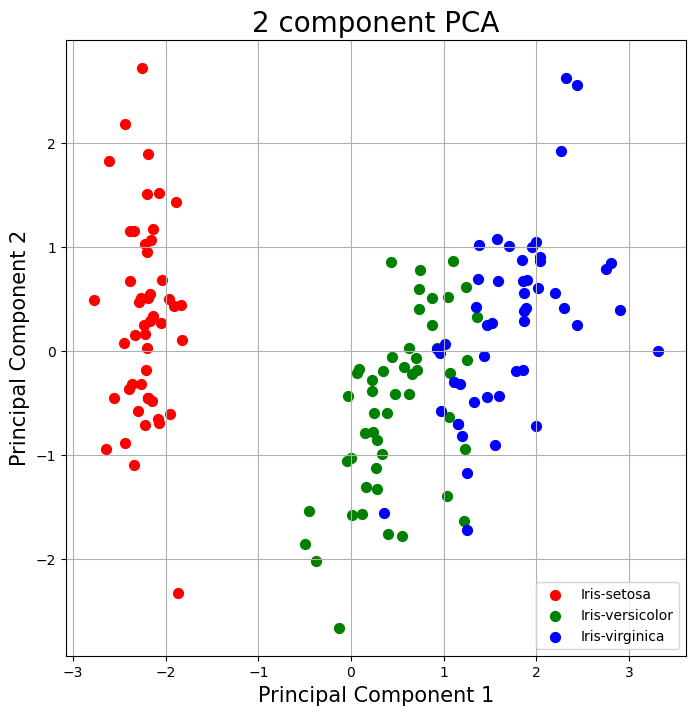

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
print('Explained variability per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variability per principal component: [0.72770452 0.23030523 0.03683832 0.00515193]
